In [35]:
import json

participant_list = ['abin','Aditya','Atul','Bhanu','Pritam','Samrudh','Shivani']

train_accuracy_list = []
test_unseen_accuracy_list = []
test_seen_accuracy_list = []
test_prototype_accuracy_list = []

train_rt_list = []
test_unseen_rt_list = []
test_seen_rt_list = []
test_prototype_rt_list = []


for participant in participant_list:
    
    with open(f'{participant}_data_prototype_exp.json') as f:
        data = json.load(f)


    total = []
    train = []
    test_seen = []
    test_unseen = []
    test_prototype = []
    
    
    for trial in data:
        try:
            if trial['total'] == 'exp':
                total.append(trial)
            if trial['test_part'] == 'train':
                train.append(trial)
            elif trial['test_part'] == 'test_unseen':
                test_unseen.append(trial)
            elif trial['test_part'] == 'test_seen':
                test_seen.append(trial)
            elif trial['test_part'] == 'test_prototype':
                test_prototype.append(trial)
        except:
            None

    if participant == 'abin' or participant == 'Shivani':    
        d1 = test_seen[0:36]          #Correction due to some mistake in tagging
        for i in d1:
            i['test_part'] = 'train'
            train.append(i)

        test_seen = test_seen[36:]
    
    
    train_accuracy = 0
    train_rt = 0

    test_unseen_accuracy = 0
    test_unseen_rt = 0

    test_seen_accuracy = 0
    test_seen_rt = 0

    test_prototype_accuracy = 0
    test_prototype_rt = 0

    for trial in train:
        train_rt += float(trial['rt'])
        if trial['correct'] == True:
            train_accuracy +=1
    train_rt /= len(train)
    train_accuracy /= len(train)

    for trial in test_unseen:
        test_unseen_rt += float(trial['rt'])
        if trial['correct'] == True:
            test_unseen_accuracy +=1
    test_unseen_rt /= len(test_unseen)
    test_unseen_accuracy /= len(test_unseen)

    for trial in test_seen:
        test_seen_rt += float(trial['rt'])
        if trial['correct'] == True:
            test_seen_accuracy +=1
    test_seen_rt /= len(test_seen)
    test_seen_accuracy /= len(test_seen)

    for trial in test_prototype:
        test_prototype_rt += float(trial['rt'])
        if trial['correct'] == True:
            test_prototype_accuracy +=1
    test_prototype_rt /= len(test_prototype)
    test_prototype_accuracy /= len(test_prototype)
    
    train_accuracy_list.append(round(train_accuracy,2))
    train_rt_list.append(round(train_rt,2))
    
    test_unseen_accuracy_list.append(round(test_unseen_accuracy,2))
    test_unseen_rt_list.append(round(test_unseen_rt,2))
    
    test_seen_accuracy_list.append(round(test_seen_accuracy,2))
    test_seen_rt_list.append(round(test_seen_rt,2))
    
    test_prototype_accuracy_list.append(round(test_prototype_accuracy,2))
    test_prototype_rt_list.append(round(test_prototype_rt,2))
    

    


In [51]:
import statistics
print(train_accuracy_list)
print(statistics.mean(test_unseen_accuracy_list))
print(statistics.mean(test_seen_accuracy_list))
print(statistics.mean(test_prototype_accuracy_list))



[0.71, 0.75, 0.73, 0.63, 0.84, 0.8, 0.84]
0.7857142857142857
0.85
0.9642857142857143


In [52]:
print(train_rt_list)
print(test_unseen_rt_list)
print(test_seen_rt_list)
print(statistics.mean(test_prototype_rt_list))

[1183.09, 2082.98, 2572.47, 2887.47, 2622.96, 1296.95, 2519.05]
[1213.92, 1599.09, 969.25, 1721.75, 2424.2, 836.43, 3163.03]
[1389.94, 2635.45, 709.54, 1017.75, 2506.25, 1225.56, 3346.8]
1438.2971428571427


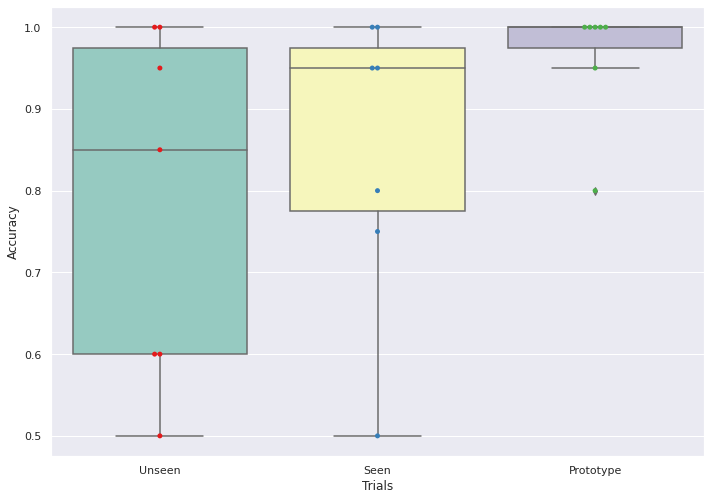

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

accuracy = pd.DataFrame(list(zip(test_unseen_accuracy_list, test_seen_accuracy_list, test_prototype_accuracy_list)), columns =['Unseen', 'Seen', 'Prototype']) 
df_melt = pd.melt(accuracy.reset_index(), id_vars=['index'], value_vars=['Unseen', 'Seen', 'Prototype'])
# replace column names
df_melt.columns = ['index', 'Trials', 'Accuracy']


ax = sns.boxplot(x='Trials', y='Accuracy', data=df_melt, palette="Set3")
ax = sns.swarmplot(x="Trials", y="Accuracy", data=df_melt, palette="Set1")
plt.show()
plt.show()

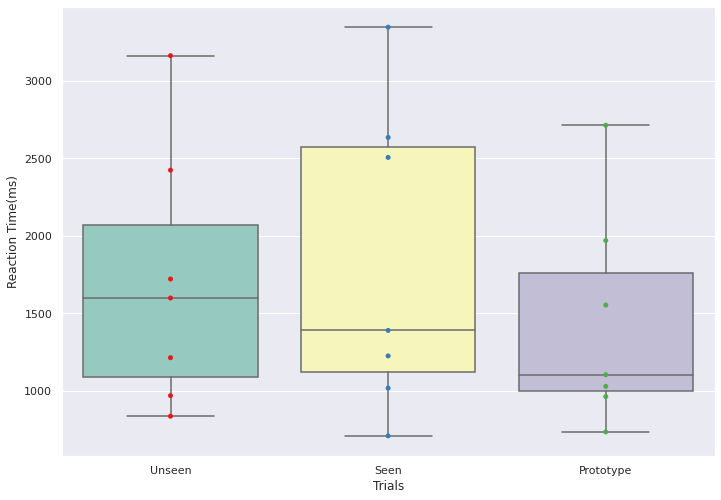

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

rt = pd.DataFrame(list(zip(test_unseen_rt_list, test_seen_rt_list, test_prototype_rt_list)), columns =['Unseen', 'Seen', 'Prototype']) 

df_melt = pd.melt(rt.reset_index(), id_vars=['index'], value_vars=['Unseen', 'Seen', 'Prototype'])
# replace column names
df_melt.columns = ['index', 'Trials', 'Reaction Time(ms)']


# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments

ax = sns.boxplot(x='Trials', y='Reaction Time(ms)', data=df_melt, palette="Set3")
ax = sns.swarmplot(x="Trials", y="Reaction Time(ms)", data=df_melt, palette="Set1")
plt.show()

In [18]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(accuracy['Unseen'], accuracy['Seen'], accuracy['Prototype'])
print(fvalue, pvalue)


# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Accuracy ~ C(Trials)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

2.203964859553809 0.13926338360433996


,sum_sq,df,F,PR(>F)
C(Trials),0.121057,2.0,2.203965,0.139263
Residual,0.494343,18.0,NaN,NaN
